<a href="https://colab.research.google.com/github/DiegoRomanCortes/Regresiones/blob/master/proyeccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
import numpy as np

Datos de casos confirmados de COVID-19 en Chile por día desde el 13 de marzo de 2020: [Fuente de Minsal](https://www.minsal.cl/nuevo-coronavirus-2019-ncov/casos-confirmados-en-chile-covid-19/)

In [0]:
t = np.array([0,1,2,3,4, 4.5, 5.5, 6.5]) #días transcurridos desde 13/03/2020 considerados hasta las 09:00 del mismo día
#desde el 18 de marzo se toman los casos hasta las 21:00 del dia anterior
#14 de marzo alcanzó fase 3
#16 de marzo alcanzó  fase 4

x = np.array([43, 61, 75, 156, 201, 238, 342, 434]) #casos respectivos totales

$x = Ae^{Bt} \implies y = \ln{x} = \ln{A} + Bt$


In [0]:
t_1 = t[4:]
x_1 = x[4:]

z = np.polyfit(t_1, np.log(x_1), 1) #retorna coeficientes de mayor a menor
#z = np.polyfit(t, np.log(x), 1) #w es la correción

t_proy = np.arange(0, len(t) + 0.5, 0.5)
y = z[1] + z[0]*t_proy

x_fit = np.exp(y) #y = ln(x)

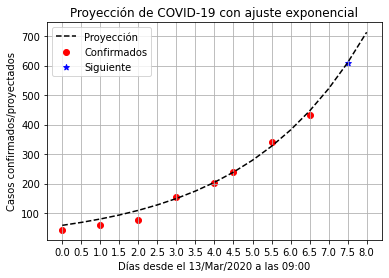

In [16]:
plt.plot(t_proy, x_fit, "k--", label="Proyección")
plt.scatter(t, x, c="r", label="Confirmados")

plt.xlabel("Días desde el 13/Mar/2020 a las 09:00")
plt.ylabel("Casos confirmados/proyectados")
plt.title("Proyección de COVID-19 con ajuste exponencial")
plt.xticks(t_proy)

new = int(x_fit[len(t)*2 - 1])
plt.scatter(t[-1] + 1, new, c='blue', marker='*', label="Siguiente")

#plt.yscale("log")

plt.legend()
plt.grid()

In [0]:
delta = np.array([])
i = 1
while i < len(x):
  delta = np.append(delta, x[i]-x[i-1])
  i+=1

tasa = np.array([])
i = 1
while i < len(delta):
  tasa = np.append(tasa, delta[i]/delta[i-1])
  i+=1

In [18]:
print("El día siguiente habrá", new, "casos (proyección exponencial)")
print("Es decir,", new - x[-1], "casos nuevos")
print("La actual tasa de crecimiento es de", tasa[-1]*100//1/100)

El día siguiente habrá 609 casos (proyección exponencial)
Es decir, 175 casos nuevos
La actual tasa de crecimiento es de 0.88
